# Zomato Data analysis using Python

### 1.Import necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.Import Data set

In [2]:
data=pd.read_csv("C:/Users/HP/DATAANALYST/Zomato data .csv")

In [3]:
print(data.head(5))

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### 3.Data cleaning

In [ ]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
data['rate']=data['rate'].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### 4.Data visualization and meaningful insights

Text(0.5, 0, 'Type of restaurant ')

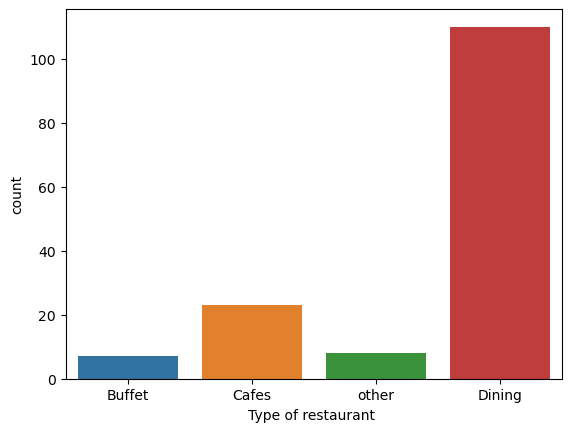

In [ ]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of restaurant ")

Text(0, 0.5, 'votes')

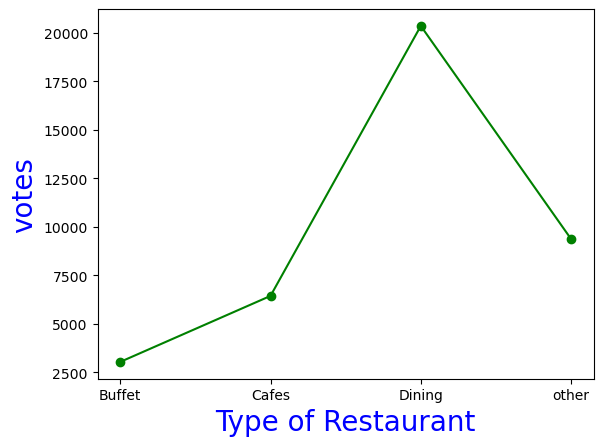

In [ ]:
group_data=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurant",c="blue",size=20)
plt.ylabel("votes",c="blue",size=20)

In [ ]:
max_votes=data['votes'].max()
restaurant_with_max_votes=data.loc[data['votes']==max_votes,'name']
print("Restaurant with max votes:",restaurant_with_max_votes)

Restaurant with max votes: 38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

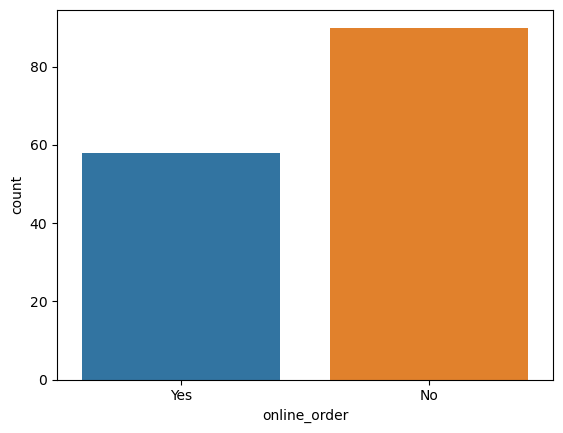

In [ ]:
sns.countplot(x=data['online_order'],data=data)

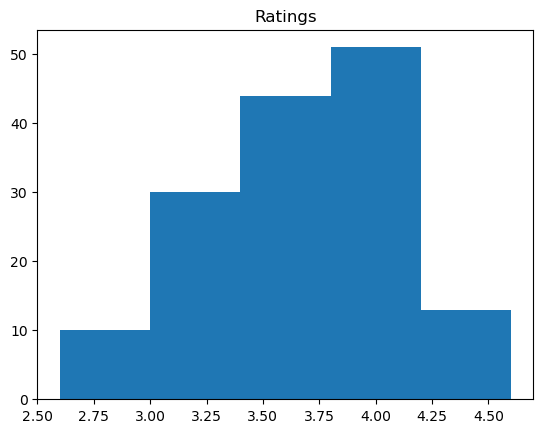

In [ ]:
plt.hist(data['rate'],bins=5)
plt.title("Ratings")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

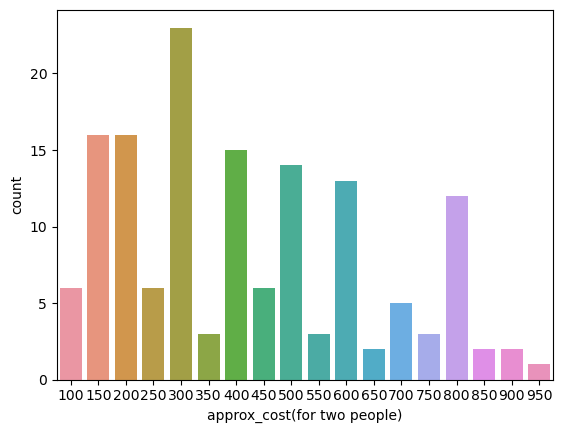

In [ ]:
couple_data=data['approx_cost(for two people)']
sns.countplot(x=couple_data)

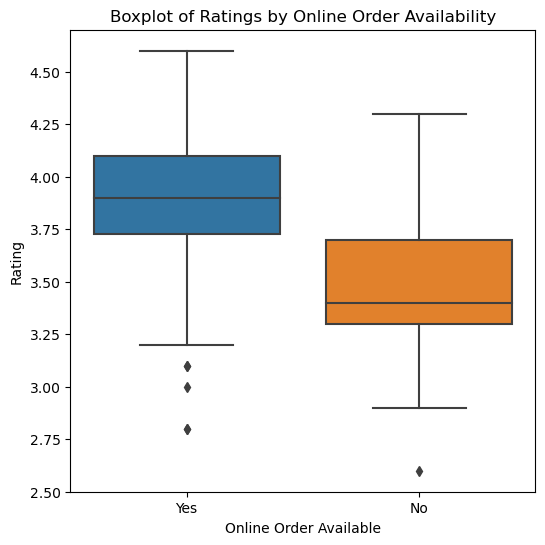

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=data)
plt.title('Boxplot of Ratings by Online Order Availability')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()

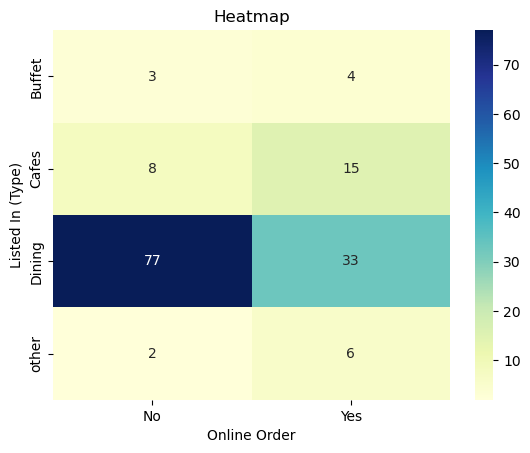

In [ ]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()